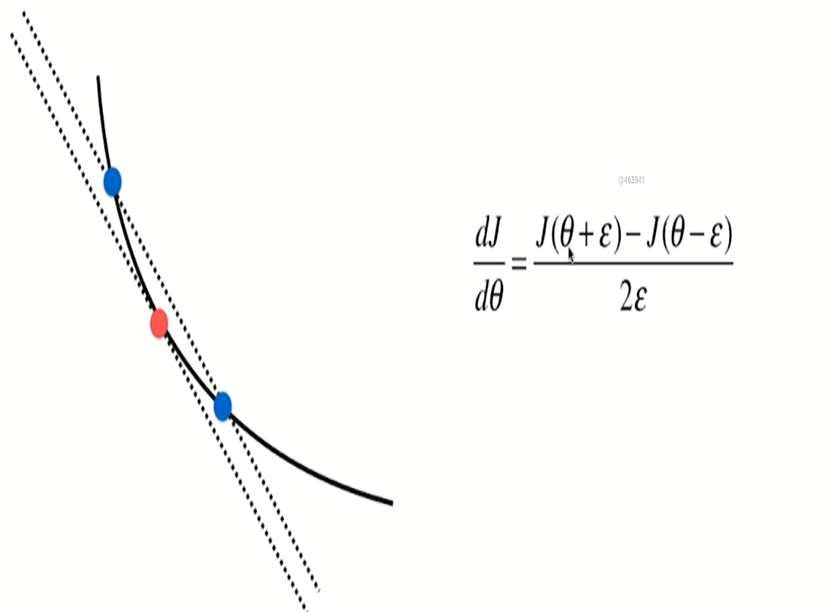

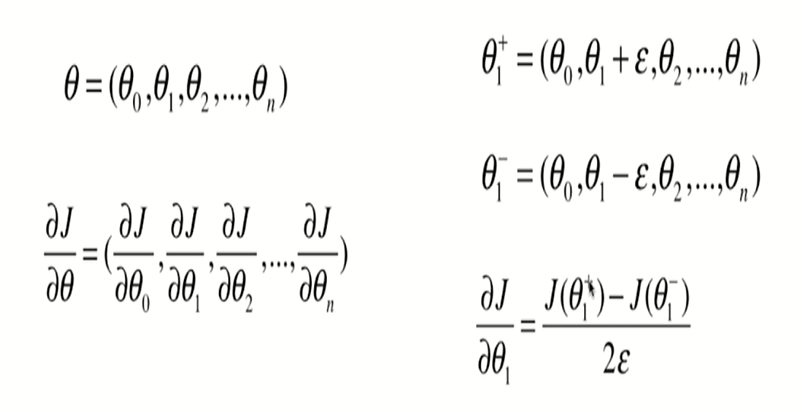

## 如何调试梯度

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(666)
X = np.random.random(size=(1000, 10))

In [4]:
true_theta = np.arange(1, 12, dtype=float)

In [6]:
X_b = np.hstack([np.ones((len(X),1)), X])
y = X_b.dot(true_theta) + np.random.normal(size=1000)

In [7]:
X_b.shape

(1000, 11)

In [8]:
y.shape

(1000,)

In [9]:
true_theta

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [10]:
def J(theta,x_b,y):
    try:
        return np.sum((y-x_b.dot(theta))**2)/len(y)
    except:
        return float('inf')

In [11]:
def dJ_math(theta,x_b,y):
    return x_b.T.dot(x_b.dot(theta)-y)*2./len(y)

In [16]:
def dJ_debug(theta,x_b,y, epsilon=0.01):
    res = np.empty(len(theta))
    for i in range(len(theta)):
        theta_1 = theta.copy()
        theta_1[i] += epsilon
        theta_2 = theta.copy()
        theta_2[i] -= epsilon
        res[i] = (J(theta_1,X_b, y) - J(theta_2, X_b, y)) / (2*epsilon)
    return res

In [13]:
def gradient_descent(dJ, x_b,y,initial_theta,eta,n_iters=1e4,epsilon=1e-10):
    theta=initial_theta
    cur_iter=0
    
    while cur_iter < n_iters:
        gradient=dJ(theta,x_b,y)
        last_theta=theta
        theta=theta-eta*gradient
        if(abs(J(theta,x_b,y)-J(last_theta,x_b,y))<epsilon):
            break
            
        cur_iter+=1
        
    return theta

In [17]:
X_b = np.hstack([np.ones((len(X),1)), X])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01

%time theta = gradient_descent(dJ_debug, X_b, y, initial_theta, eta)
theta

Wall time: 3.69 s


array([ 1.1251597 ,  2.05312521,  2.91522497,  4.11895968,  5.05002117,
        5.90494046,  6.97383745,  8.00088367,  8.86213468,  9.98608331,
       10.90529198])

In [19]:
%time theta = gradient_descent(dJ_math, X_b, y, initial_theta, eta)
theta

Wall time: 765 ms


array([ 1.1251597 ,  2.05312521,  2.91522497,  4.11895968,  5.05002117,
        5.90494046,  6.97383745,  8.00088367,  8.86213468,  9.98608331,
       10.90529198])